In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [92]:
df = pd.read_csv('diabetes.csv')

In [93]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [95]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [96]:
def get_clf_eval(y_test,pred=None,pred_proba=None):
    from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test,pred_proba)
    print('오차행렬')
    print(confusion)
    print(f'정확도:{accuracy:.4f},정밀도:{precision:.4f},재현율:{recall:.4f},f1:{f1:.4f},AUC:{roc_auc:.4f}')
    
def get_eval_by_threshold(y_test,pred_proba,thresholds):
    from sklearn.preprocessing import Binarizer
    for threshold in thresholds:
        pred = Binarizer(threshold=threshold).fit_transform(pred_proba)
        print('임계값:',threshold)
        get_clf_eval(y_test,pred)
        
def precision_recall_curve_plot(y_test,pred_proba):
    from sklearn.metrics import precision_recall_curve
    precisions,recalls,thresholds = precision_recall_curve(y_test,
                                                           pred_proba)
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds,
             precisions[0:threshold_boundary],
             linestyle='--',
             label='precision')
    plt.plot(thresholds,
             recalls[0:threshold_boundary],
             label='recall')
    start,end = plt.xlim()
    plt.xticks(np.round( np.arange(start,end,0.1) , 2))
    plt.legend()
    plt.grid()
    plt.show()
    
def roc_curve_plot(y_test,pred_proba):
    from sklearn.metrics import roc_curve
    fprs,tprs,thresholds = roc_curve(y_test,pred_proba)
    plt.plot(fprs,tprs,label='ROC')
    plt.plot([0,1],[0,1],'k--',label='random')
    start,end = plt.xlim()
    plt.xticks(np.round( np.arange(start,end,0.1) ,2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.legend()
    plt.show()

In [97]:
y = df['Outcome']
x = df.drop(columns='Outcome')

x_train,x_test,y_train,y_test = train_test_split(x,
                                                 y,
                                                 test_size=0.2,
                                                 random_state=156,
                                                 stratify=y)
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(x_train,y_train)
pred = lr_clf.predict(x_test)
pred_proba = lr_clf.predict_proba(x_test)[:,1]

In [98]:
get_clf_eval(y_test,pred,pred_proba)

오차행렬
[[87 13]
 [22 32]]
정확도:0.7727,정밀도:0.7111,재현율:0.5926,f1:0.6465,AUC:0.8083


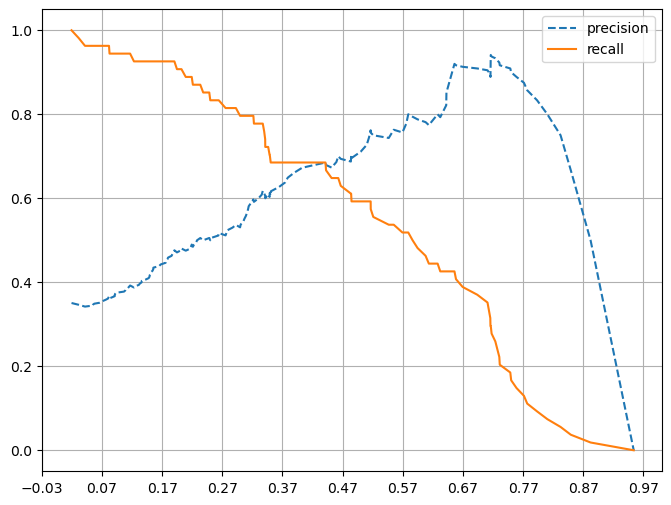

In [99]:
precision_recall_curve_plot(y_test,pred_proba)

In [100]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

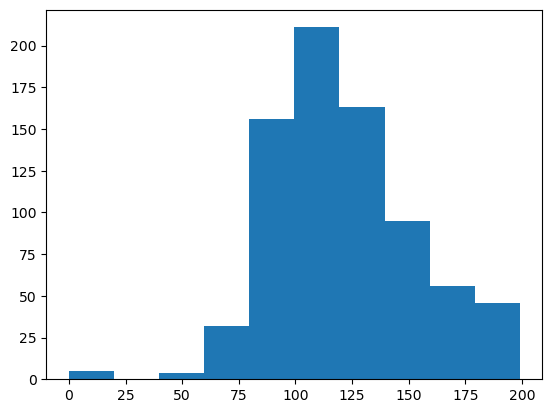

In [101]:
plt.hist(df['Glucose'])

In [102]:
zero_features = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
total_count = df['Glucose'].count()
for feature in zero_features:
    zero_count = df[df[feature]==0][feature].count()
    print(f'{feature}컬럼에 0 건수:{zero_count}, 퍼센트:{100*zero_count/total_count:.2f}')

Glucose컬럼에 0 건수:5, 퍼센트:0.65
BloodPressure컬럼에 0 건수:35, 퍼센트:4.56
SkinThickness컬럼에 0 건수:227, 퍼센트:29.56
Insulin컬럼에 0 건수:374, 퍼센트:48.70
BMI컬럼에 0 건수:11, 퍼센트:1.43


In [103]:
mean_zero_features = df[zero_features].mean()

In [104]:
df[zero_features] = df[zero_features].replace(0,mean_zero_features)

In [105]:
zero_features = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
total_count = df['Glucose'].count()
for feature in zero_features:
    zero_count = df[df[feature]==0][feature].count()
    print(f'{feature}컬럼에 0 건수:{zero_count}, 퍼센트:{100*zero_count/total_count:.2f}')

Glucose컬럼에 0 건수:0, 퍼센트:0.00
BloodPressure컬럼에 0 건수:0, 퍼센트:0.00
SkinThickness컬럼에 0 건수:0, 퍼센트:0.00
Insulin컬럼에 0 건수:0, 퍼센트:0.00
BMI컬럼에 0 건수:0, 퍼센트:0.00


In [106]:
y = df['Outcome']
x = df.drop(columns='Outcome')

x_train,x_test,y_train,y_test = train_test_split(x,
                                                 y,
                                                 test_size=0.2,
                                                 random_state=156,
                                                 stratify=y)
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(x_train,y_train)
pred = lr_clf.predict(x_test)
pred_proba = lr_clf.predict_proba(x_test)[:,1]

In [107]:
get_clf_eval(y_test,pred,pred_proba)
# 오차행렬
# [[87 13]
#  [22 32]]
# 정확도:0.7727,정밀도:0.7111,재현율:0.5926,f1:0.6465,AUC:0.8083

오차행렬
[[88 12]
 [22 32]]
정확도:0.7792,정밀도:0.7273,재현율:0.5926,f1:0.6531,AUC:0.8443


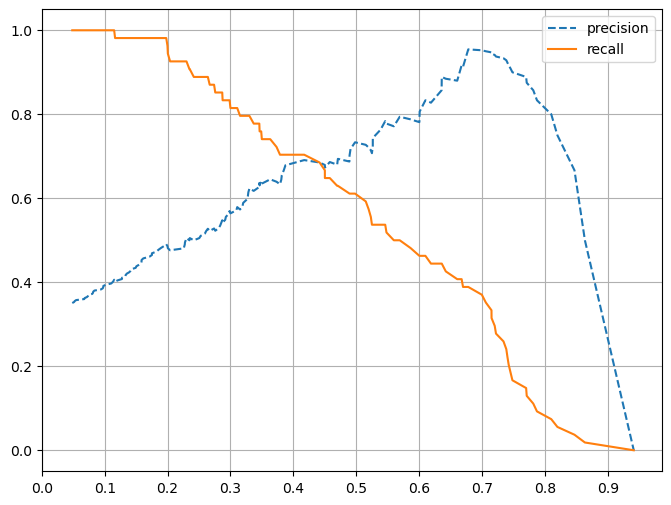

In [108]:
precision_recall_curve_plot(y_test,pred_proba)

In [109]:
from sklearn.preprocessing import Binarizer

In [110]:
binarizer = Binarizer(threshold=0.45)
pred_b = binarizer.fit_transform(pred_proba.reshape(-1,1))
get_clf_eval(y_test,pred_b,pred_proba)
# 오차행렬
# [[88 12]
#  [22 32]]
# 정확도:0.7792,정밀도:0.7273,재현율:0.5926,f1:0.6531,AUC:0.8443

오차행렬
[[83 17]
 [18 36]]
정확도:0.7727,정밀도:0.6792,재현율:0.6667,f1:0.6729,AUC:0.8443
